In [1]:
"""
處理步驟:
1.資料預處理:處理後，會產生features(數字影像特徵值)與label(數字真實的值)
2.建立模型:建立卷積神經網路(convolutional neural network)
3.訓練模型:將features和label丟入模型訓練，週期為10次
4.評估模型的準確率:使用測試資料，評估模型準確率
5.進行預測:將測試資料丟入訓練完成的模型，進行預測
"""

'\n處理步驟:\n1.資料預處理:處理後，會產生features(數字影像特徵值)與label(數字真實的值)\n2.建立模型:建立卷積神經網路(convolutional neural network)\n3.訓練模型:將features和label丟入模型訓練，週期為10次\n4.評估模型的準確率:使用測試資料，評估模型準確率\n5.進行預測:將測試資料丟入訓練完成的模型，進行預測\n'

In [3]:
#匯入模組
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [4]:
#讀取mnist資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
#轉換為4維矩陣，因為資料需要先進行卷積和池化運算，必須保持影像維度
x_train4d = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4d = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [6]:
#將features標準化
x_train4d_normalize = x_train4d / 255
x_test4d_normalize = x_test4d / 255

In [7]:
#將label值透過Onehot encoding轉換
y_trainonehot = np_utils.to_categorical(y_train)
y_testonehot = np_utils.to_categorical(y_test)

In [8]:
#建立模型

In [10]:
#匯入所需模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [11]:
#建立線性堆疊模型
model = Sequential()

#  建立卷積層1

In [13]:
# filters= 16 #建立16個濾鏡 filter weight
# kernel_size=(5,5) 每一個濾鏡5*5大小
# padding='same'此設定讓卷積運算，產生的卷積影像大小不變
# 28,28為影像形狀，1為單色維度
# activation = 'relu' 設定relu激活函數
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding = 'same',
                input_shape=(28,28,1),
                activation = 'relu'))

# 建立池化層1

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2

In [15]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

# 建立池化層2，並加入dropout避免overfitting

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#加入dropout(0.25)隨機在神經網路中放棄25%的神經元，避免overfitting
model.add(Dropout(0.25))

# 建立平坦層


In [18]:
#36*7*7=1764
model.add(Flatten())

# 建立隱藏層

In [19]:
model.add(Dense(128,activation = 'relu'))

In [20]:
#隨機在神經網路中放棄50%神經元，避免overfitting
model.add(Dropout(0.5))

# 建立輸出層

In [21]:
model.add(Dense(10,activation ='softmax'))

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [23]:
#進行訓練
#loss(損失函數):使用cross_entropy交叉熵，訓練效果比較好
#optimizer:使用adam最優化方法，讓訓練更快收斂提高準確率
#metrics:設定評估模型的方式為準確率
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
#開始訓練
train_history = model.fit(x=x_train4d_normalize,
                         y=y_trainonehot,validation_split=0.2,
                         epochs=10,
                         batch_size=300,
                         verbose=2)

Epoch 1/10
160/160 - 22s - loss: 0.4833 - accuracy: 0.8497 - val_accuracy: 0.9688 - val_loss: 0.1033
Epoch 2/10
160/160 - 22s - loss: 0.1384 - accuracy: 0.9588 - val_accuracy: 0.9797 - val_loss: 0.0653
Epoch 3/10
160/160 - 22s - loss: 0.0995 - accuracy: 0.9700 - val_accuracy: 0.9835 - val_loss: 0.0533
Epoch 4/10
160/160 - 22s - loss: 0.0815 - accuracy: 0.9750 - val_accuracy: 0.9857 - val_loss: 0.0472
Epoch 5/10
160/160 - 22s - loss: 0.0691 - accuracy: 0.9790 - val_accuracy: 0.9878 - val_loss: 0.0423
Epoch 6/10
160/160 - 22s - loss: 0.0620 - accuracy: 0.9816 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 7/10
160/160 - 23s - loss: 0.0526 - accuracy: 0.9844 - val_accuracy: 0.9906 - val_loss: 0.0346
Epoch 8/10
160/160 - 25s - loss: 0.0478 - accuracy: 0.9855 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 9/10
160/160 - 22s - loss: 0.0462 - accuracy: 0.9859 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 10/10
160/160 - 22s - loss: 0.0416 - accuracy: 0.9868 - val_accuracy: 0.9914 - val_lo

In [25]:
#顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

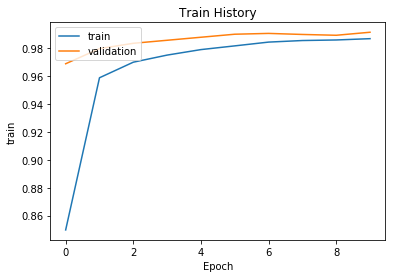

In [27]:
show_train_history(train_history,'accuracy','val_accuracy')

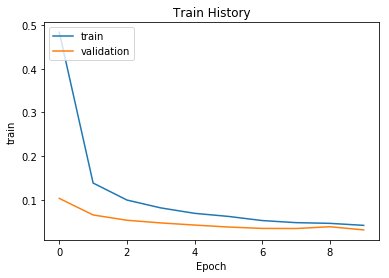

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
#評估模型準確率
scores = model.evaluate(x_test4d_normalize,y_testonehot)
scores[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.0256 - accuracy: 0.9920


0.9919999837875366

In [31]:
prediction = np.argmax(model.predict(x_test4d_normalize), axis=-1)

In [32]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [33]:
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

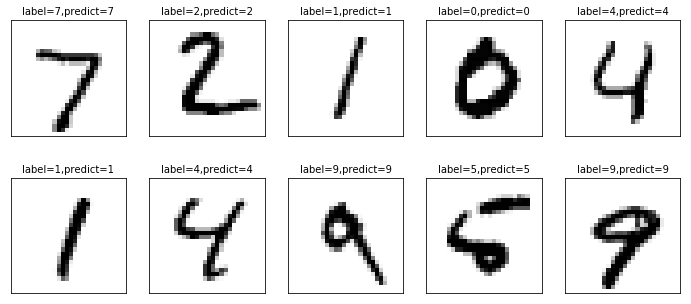

In [34]:
#繪出前10筆結果
plot_image_labels_prediction(x_test,y_test,prediction,idx=0)

In [35]:
#繪製混淆矩陣
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1133,1,0,0,0,0,0,1,0
2,2,1,1026,0,0,0,0,2,1,0
3,0,0,0,1006,0,1,0,2,1,0
4,0,0,0,0,980,0,0,0,1,1
5,1,0,0,5,0,883,1,1,0,1
6,4,2,0,0,1,4,945,0,2,0
7,0,2,3,1,0,0,0,1020,1,1
8,2,0,2,1,1,1,0,1,964,2
